<a href="https://colab.research.google.com/github/eith010/ANN_HW1/blob/main/Transferlearning%20with%20data%20augmentation%20and%20fine%20tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Report here, added some points throughout the code, you can keep those points in mind and remove some from code, also add more comments if you can. If we are using yours without data augmentation, remove that part from code.

Email object-ANNDL2021_Homework1

Below part will be in email.
NAME_1: yours
LAST-NAME_1, yours
STUDENT-ID_1: yours
NAME_2: Nazar
LAST-NAME_2, Kamaal
STUDENT-ID_2: 10702190

email attachment-zip file The_Beginners.zip containing:
either this or your notebook

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
%cd /gdrive/My Drive/ANNDL2/
!ls

/gdrive/My Drive/ANNDL2
Finaltry	 leaves     transferlearning_experiments  Untitled0.ipynb
hw1_experiments  model.png  Transferlearning.ipynb


In [ ]:
#importing all required libraries
import tensorflow as tf
import numpy as np
import os   #for traversing in folders,making directories
import random   
import pandas as pd
import seaborn as sns   #helps in plotting, based on matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split   #automatically splits data set into training and validation 
#from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, we didn't make these so we can remove from code
#from sklearn.metrics import confusion_matrix
from PIL import Image

tfk = tf.keras
tfkl = tf.keras.layers

In [ ]:
# Random seed for reproducibility. 
# We use random seed value while creating training and test data set to is to make sure we get the same training and validation data set while we use different hyperparameters or machine learning algorithms in order to assess the performance of different models.
seed = 60

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

In [ ]:
labels = [
    'Apple', 
    'Blueberry', 
    'Cherry', 
    'Corn', 
    'Grape', 
    'Orange', 
    'Peach', 
    'Pepper', 
    'Potato', 
    'Raspberry',
    'Soybean', 
    'Squash', 
    'Strawberry', 
    'Tomato', 
]

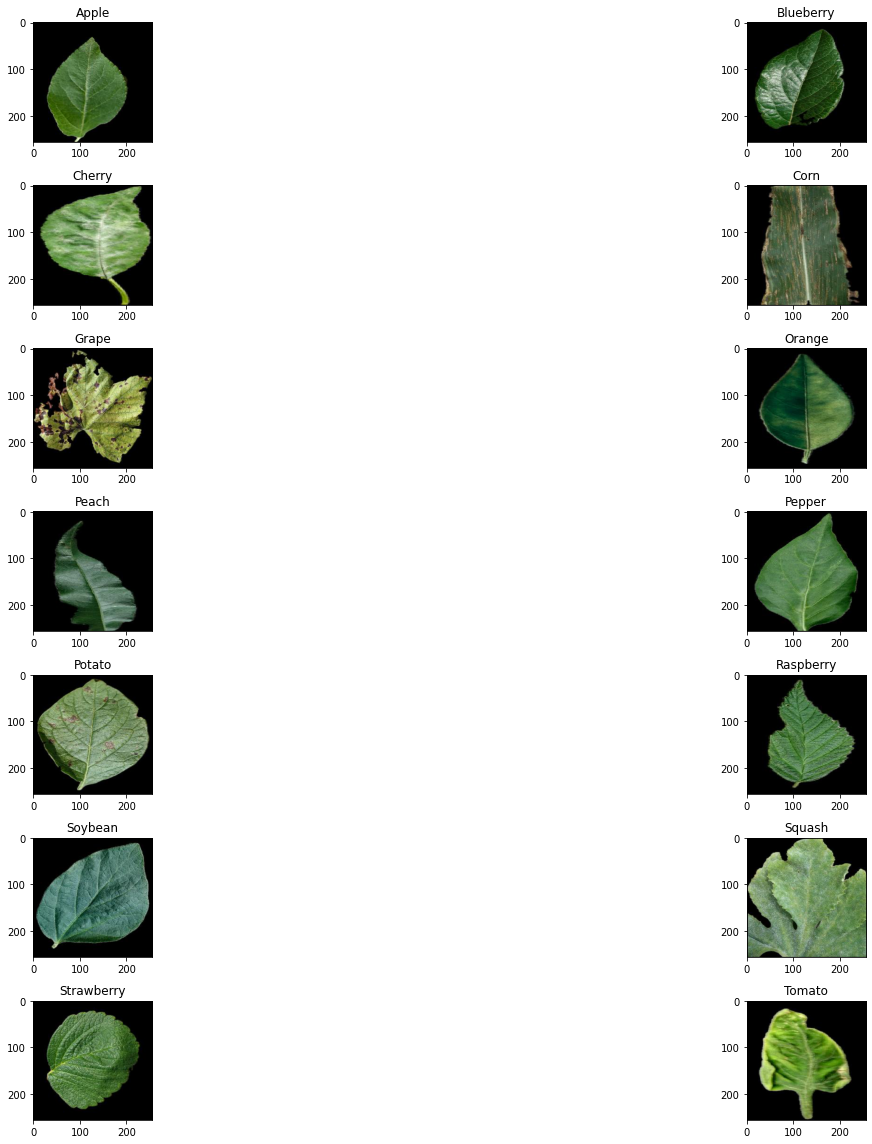

In [ ]:
#checking if we are reading all folders and printing 1 image from each
num_row = 7
num_col = 2
fig, axes = plt.subplots(num_row, num_col, figsize=(4*num_row,8*num_col))
for i in range(num_row*num_col):
  if i < 14:
    class_imgs = next(os.walk('Finaltry/training/{}/'.format(labels[i])))[2]
    class_img = class_imgs[0]
    img = Image.open('Finaltry/training/{}/{}'.format(labels[i], class_img))
    ax = axes[i//num_col, i%num_col]
    ax.imshow(np.array(img))
    ax.set_title('{}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [ ]:
#dataset
dataset_dir = 'Finaltry/training'

In [ ]:
#making sure if we are reading from dataset correctly
!ls
# Inspect dataset structure on disk
print("Depth 0 (dataset)")
print("-------")
!ls Finaltry
print()
print("Depth 1 (e.g., training/straw)")
print("------------------------")
!ls Finaltry/training
print()
print("Depth 2 (e.g., FInaltry/training/Apple)")
print("------------------------")
!ls Finaltry/training/Apple
print()

Finaltry  hw1_experiments  leaves  model.png  Transferlearning.ipynb
Depth 0 (dataset)
-------
training

Depth 1 (e.g., training/straw)
------------------------
Apple	   Cherry  Grape   Peach   Potato     Soybean  Strawberry
Blueberry  Corn    Orange  Pepper  Raspberry  Squash   Tomato

Depth 2 (e.g., FInaltry/training/Apple)
------------------------
00001.jpg  00182.jpg  00355.jpg  00537.jpg  22499.jpg  22682.jpg  22855.jpg
00003.jpg  00183.jpg  00357.jpg  00538.jpg  22501.jpg  22683.jpg  22856.jpg
00004.jpg  00184.jpg  00358.jpg  00539.jpg  22502.jpg  22684.jpg  22857.jpg
00005.jpg  00185.jpg  00359.jpg  00540.jpg  22504.jpg  22685.jpg  22858.jpg
00006.jpg  00186.jpg  00360.jpg  00543.jpg  22505.jpg  22686.jpg  22859.jpg
00007.jpg  00187.jpg  00361.jpg  00544.jpg  22506.jpg  22687.jpg  22860.jpg
00008.jpg  00188.jpg  00362.jpg  00545.jpg  22507.jpg  22688.jpg  22861.jpg
00009.jpg  00189.jpg  00363.jpg  00546.jpg  22509.jpg  22690.jpg  22862.jpg
00011.jpg  00192.jpg  00364.jpg  00547.

In [ ]:
#using ImageDataGenerator to load images from directory (flow_from_directory) and splitting 20% images as validation set.

image_generator = ImageDataGenerator(validation_split=0.2)    

train_gen = image_generator.flow_from_directory(
                                                 directory=dataset_dir,
                                                 target_size=(256,256),
                                                 color_mode='rgb',
                                                 classes=None, # can be set to labels
                                                 class_mode='categorical',
                                                 batch_size=8,
                                                 shuffle=True,
                                                 seed=seed,
                                                 subset="training"
                                                 )

validation_gen = image_generator.flow_from_directory( 
                                                 directory=dataset_dir,
                                                 target_size=(256,256),
                                                 color_mode='rgb',
                                                 classes=None, # can be set to labels
                                                 class_mode='categorical',
                                                 batch_size=8,
                                                 shuffle=True,
                                                 seed=seed,
                                                 subset="validation"
                                                 )

Found 14189 images belonging to 14 classes.
Found 3539 images belonging to 14 classes.


In [ ]:
print("Assigned labels")
print(train_gen.class_indices)
print()
print("Target classes")
print(train_gen.classes)

Assigned labels
{'Apple': 0, 'Blueberry': 1, 'Cherry': 2, 'Corn': 3, 'Grape': 4, 'Orange': 5, 'Peach': 6, 'Pepper': 7, 'Potato': 8, 'Raspberry': 9, 'Soybean': 10, 'Squash': 11, 'Strawberry': 12, 'Tomato': 13}

Target classes
[ 0  0  0 ... 13 13 13]


In [ ]:
#generating batches of images
def get_next_batch(generator):
  batch = next(generator)

  image = batch[0]
  target = batch[1]

  print("(Input) image shape:", image.shape)
  print("Target shape:",target.shape)

  # Visualize only the first sample
  image = image[0]
  target = target[0]
  target_idx = np.argmax(target)
  print()
  print("Categorical label:", target)
  print("Label:", target_idx)
  print("Class name:", labels[target_idx])
  fig = plt.figure(figsize=(6, 4))
  plt.imshow(np.uint8(image))

  return batch

(Input) image shape: (8, 256, 256, 3)
Target shape: (8, 14)

Categorical label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Label: 13
Class name: Tomato


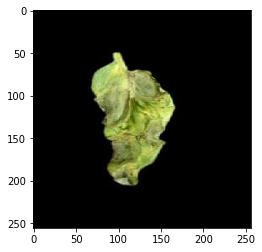

In [ ]:
# Get a sample from dataset and show info
_ = get_next_batch(train_gen)

In [ ]:
#inputs- 256*256 images in rgb colors. setting epochs at 200
input_shape = (256, 256, 3)
epochs = 200

In [ ]:
#Making CNN model.
#add why we do it,and why used relu as activation, why did global pooling,why used Adam as optimizer, why did dropout, in output layer why we did soft max


def build_model(input_shape):

    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')

    conv1 = tfkl.Conv2D(
        filters=16,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed),
        name = 'Conv1')(input_layer)
    pool1 = tfkl.MaxPooling2D(name = 'Pool1')(conv1)

    conv2 = tfkl.Conv2D(
        filters=32,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed),
        name = 'Conv2')(pool1)
    pool2 = tfkl.MaxPooling2D(name = 'Pool2')(conv2)

    conv3 = tfkl.Conv2D(
        filters=64,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed),
        name = 'Conv3')(pool2)
    pool3 = tfkl.MaxPooling2D(name = 'Pool3')(conv3)

    conv4 = tfkl.Conv2D(
        filters=128,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed),
        name='Conv4')(pool3)

    glob_pooling = tfkl.GlobalAveragePooling2D(name='GloablPooling')(conv4)
    glob_pooling = tfkl.Dropout(0.2, seed=seed, name='GloablPoolingDropout')(glob_pooling)

    classifier_layer = tfkl.Dense(
        units=256,  
        activation='relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed),
        name='Classifier')(glob_pooling)
    classifier_layer = tfkl.Dropout(0.2, seed=seed, name='ClassifierDropout')(classifier_layer)

    output_layer = tfkl.Dense(
        units=14, 
        activation='softmax', 
        kernel_initializer = tfk.initializers.GlorotUniform(seed),
        name='Output')(classifier_layer)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')

    # Compile the model
    model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics='accuracy')

    # Return the model
    return model

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 256, 256, 3)]     0         
                                                                 
 Conv1 (Conv2D)              (None, 256, 256, 16)      448       
                                                                 
 Pool1 (MaxPooling2D)        (None, 128, 128, 16)      0         
                                                                 
 Conv2 (Conv2D)              (None, 128, 128, 32)      4640      
                                                                 
 Pool2 (MaxPooling2D)        (None, 64, 64, 32)        0         
                                                                 
 Conv3 (Conv2D)              (None, 64, 64, 64)        18496     
                                                                 
 Pool3 (MaxPooling2D)        (None, 32, 32, 64)        0     

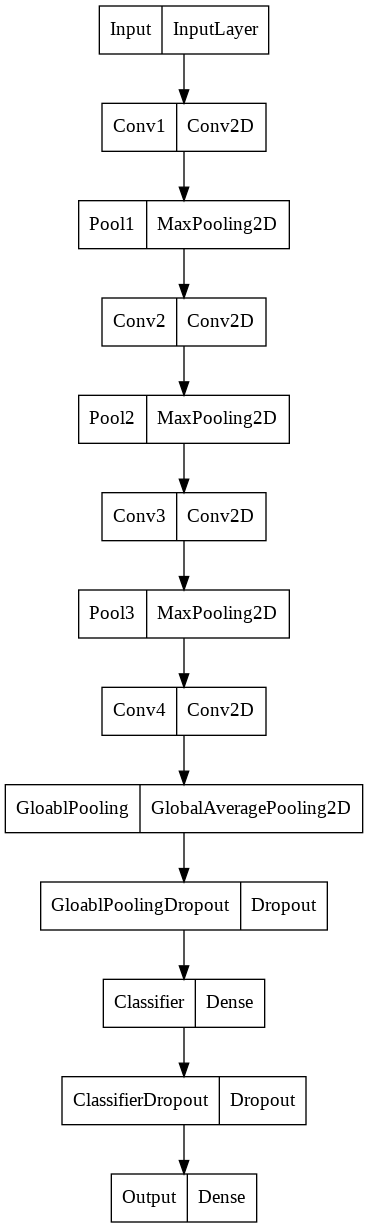

In [ ]:
#building the model and seeing the parameters
model2 = build_model(input_shape)
model2.summary()
tfk.utils.plot_model(model2)

In [ ]:
#why to do data augmentation-to create more images when we have less dataset so to increase dataset. Here we are doing it to to fine tune data set with improved pictures 
# Create an instance of ImageDataGenerator with Data Augmentation
aug_train_data_gen = ImageDataGenerator(rotation_range=20,
                                        height_shift_range=40,
                                        width_shift_range=40,
                                        zoom_range=0.2,
                                        horizontal_flip=True,
                                        vertical_flip=True, 
                                        fill_mode='reflect',
                                        rescale=1/255.) # rescale value is multiplied to the image


# Obtain a data generator with the 'ImageDataGenerator.flow_from_directory' method
aug_train_gen = aug_train_data_gen.flow_from_directory(directory=dataset_dir,
                                                       target_size=(256,256),
                                                       color_mode='rgb',
                                                       classes=None, # can be set to labels
                                                       class_mode='categorical',
                                                       batch_size=8,
                                                       shuffle=True,
                                                       seed=seed)


Found 17728 images belonging to 14 classes.


In [ ]:
#Transfer learning
# Apply same preprocessing used to train the supernet 
from tensorflow.keras.applications.vgg16 import preprocess_input


58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                              

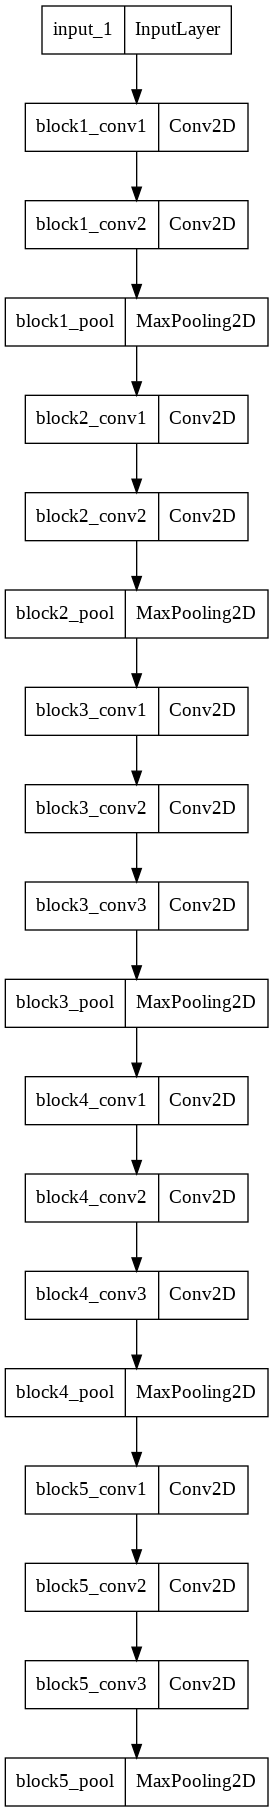

In [ ]:
#Why Vgg16?
# Download and plot the VGG16 model
supernet = tfk.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(256,256,3)
)
supernet.summary()
tfk.utils.plot_model(supernet)

In [ ]:
# Use the supernet as feature extractor
supernet.trainable = False

inputs = tfk.Input(shape=(256,256,3))

x = supernet(inputs)
x = tfkl.Flatten(name='Flattening')(x)
x = tfkl.Dropout(0.3, seed=seed)(x)
x = tfkl.Dense(
    256, 
    activation='relu',
    kernel_initializer = tfk.initializers.GlorotUniform(seed))(x)
x = tfkl.Dropout(0.3, seed=seed)(x)
outputs = tfkl.Dense(
    14, 
    activation='softmax',
    kernel_initializer = tfk.initializers.GlorotUniform(seed))(x)


# Connect input and output through the Model class
tl_model = tfk.Model(inputs=inputs, outputs=outputs, name='model')

# Compile the model
tl_model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics='accuracy')
tl_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 Flattening (Flatten)        (None, 32768)             0         
                                                                 
 dropout (Dropout)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 256)               8388864   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 14)                3598  

In [ ]:
# Utility function to create folders and callbacks for training
from datetime import datetime

def create_folders_and_callbacks(model_name):

  exps_dir = os.path.join('hw1_experiments')
  if not os.path.exists(exps_dir):
      os.makedirs(exps_dir)

  now = datetime.now().strftime('%b%d_%H-%M-%S')

  exp_dir = os.path.join(exps_dir, model_name + '_' + str(now))
  if not os.path.exists(exp_dir):
      os.makedirs(exp_dir)
      
  callbacks = []

  # Model checkpoint
  # ----------------
  ckpt_dir = os.path.join(exp_dir, 'ckpts')
  if not os.path.exists(ckpt_dir):
      os.makedirs(ckpt_dir)
#we are saving full model and not just weights 
  ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(ckpt_dir, 'cp.ckpt'), 
                                                     save_weights_only=False, # True to save only weights
                                                     save_best_only=False) # True to save only the best epoch 
  callbacks.append(ckpt_callback)

  # Visualize Learning on Tensorboard
  # ---------------------------------
  tb_dir = os.path.join(exp_dir, 'tb_logs')
  if not os.path.exists(tb_dir):
      os.makedirs(tb_dir)
      
  # By default shows losses and metrics for both training and validation
  tb_callback = tf.keras.callbacks.TensorBoard(log_dir=tb_dir, 
                                               profile_batch=0,
                                               histogram_freq=1)  # if > 0 (epochs) shows weights histograms
  callbacks.append(tb_callback)

  # Early Stopping
  # --------------
  es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
  callbacks.append(es_callback)

  return callbacks

In [ ]:
tf.get_logger().setLevel('WARNING') #  if you want to suppress only INFOs
tf.get_logger().setLevel('ERROR') #  if you want to suppress both WARNINGs and INFOs

# Create folders and callbacks and fit
transfer_callbacks = create_folders_and_callbacks(model_name='TransferLearning_Model')

# Train the model
tl_history = tl_model.fit(
    x =aug_train_gen ,
    epochs = epochs,
    validation_data = validation_gen,
    callbacks = transfer_callbacks,
).history

Epoch 1/200
2216/2216 [==============================] - 2862s 1s/step - loss: 1.0907 - accuracy: 0.6575 - val_loss: 18.3932 - val_accuracy: 0.5242
Epoch 2/200
2216/2216 [==============================] - 463s 209ms/step - loss: 0.7669 - accuracy: 0.7427 - val_loss: 17.1604 - val_accuracy: 0.5945
Epoch 3/200
2216/2216 [==============================] - 469s 211ms/step - loss: 0.7050 - accuracy: 0.7636 - val_loss: 19.3467 - val_accuracy: 0.6197
Epoch 4/200
2216/2216 [==============================] - 463s 209ms/step - loss: 0.6590 - accuracy: 0.7814 - val_loss: 20.1862 - val_accuracy: 0.6304
Epoch 5/200
2216/2216 [==============================] - 480s 217ms/step - loss: 0.6297 - accuracy: 0.7917 - val_loss: 23.5392 - val_accuracy: 0.6075
Epoch 6/200
2216/2216 [==============================] - 506s 228ms/step - loss: 0.5947 - accuracy: 0.7999 - val_loss: 26.0744 - val_accuracy: 0.6081
Epoch 7/200
2216/2216 [==============================] - 471s 212ms/step - loss: 0.5793 - accuracy: 0.

In [ ]:
#saving the best model
tl_model.save("transferlearning_experiments/TransferModel_Best")

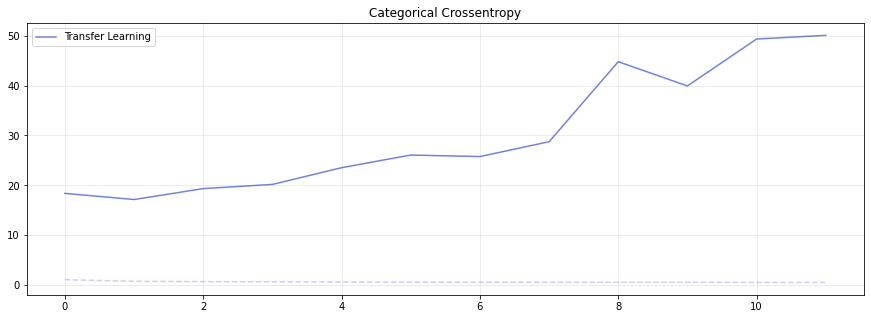

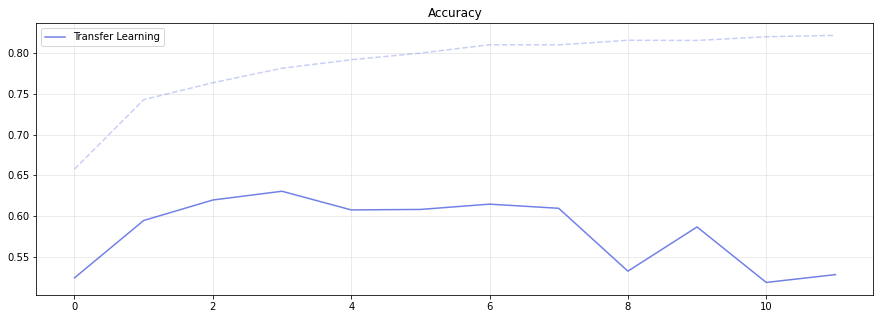

In [ ]:
# Plot the training
plt.figure(figsize=(15,5))
plt.plot(tl_history['loss'], alpha=.3, color='#4D61E2', linestyle='--')
plt.plot(tl_history['val_loss'], label='Transfer Learning', alpha=.8, color='#4D61E2')
plt.legend(loc='upper left')
plt.title('Categorical Crossentropy')
plt.grid(alpha=.3)

plt.figure(figsize=(15,5))
plt.plot(tl_history['accuracy'], alpha=.3, color='#4D61E2', linestyle='--')
plt.plot(tl_history['val_accuracy'], label='Transfer Learning', alpha=.8, color='#4D61E2')
plt.legend(loc='upper left')
plt.title('Accuracy')
plt.grid(alpha=.3)

plt.show()

In [ ]:
ft_model = tfk.models.load_model("transferlearning_experiments/TransferModel_Best")

In [ ]:
ft_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 Flattening (Flatten)        (None, 32768)             0         
                                                                 
 dropout (Dropout)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 256)               8388864   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 14)                3598  

In [ ]:
#why did fine tuning
# Set all VGG layers to True
ft_model.get_layer('vgg16').trainable = True
for i, layer in enumerate(ft_model.get_layer('vgg16').layers):
   print(i, layer.name, layer.trainable)

0 input_1 True
1 block1_conv1 True
2 block1_conv2 True
3 block1_pool True
4 block2_conv1 True
5 block2_conv2 True
6 block2_pool True
7 block3_conv1 True
8 block3_conv2 True
9 block3_conv3 True
10 block3_pool True
11 block4_conv1 True
12 block4_conv2 True
13 block4_conv3 True
14 block4_pool True
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True


In [ ]:
# Freeze first N layers, e.g., until  14
for i, layer in enumerate(ft_model.get_layer('vgg16').layers[:14]):
  layer.trainable=False
for i, layer in enumerate(ft_model.get_layer('vgg16').layers):
   print(i, layer.name, layer.trainable)
ft_model.summary()

0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool True
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 Flattening (Flatten)        (None, 32768)             0         
                                                                 
 dropout (Dropout)           (None, 32768)             0        

In [ ]:
ft_model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(1e-4), metrics='accuracy')

In [ ]:
ft_history = ft_model.fit(
    x =aug_train_gen ,
    epochs = epochs,
    validation_data = validation_gen,
    callbacks = transfer_callbacks,
).history

Epoch 1/200
2216/2216 [==============================] - 486s 219ms/step - loss: 1.8989 - accuracy: 0.3989 - val_loss: 30.5100 - val_accuracy: 0.5208
Epoch 2/200
2216/2216 [==============================] - 493s 223ms/step - loss: 0.9836 - accuracy: 0.6714 - val_loss: 49.6640 - val_accuracy: 0.5276
Epoch 3/200
2216/2216 [==============================] - 494s 223ms/step - loss: 0.5111 - accuracy: 0.8339 - val_loss: 66.9642 - val_accuracy: 0.5010
Epoch 4/200
2216/2216 [==============================] - 496s 224ms/step - loss: 0.3143 - accuracy: 0.9013 - val_loss: 45.3940 - val_accuracy: 0.6386
Epoch 5/200
2216/2216 [==============================] - 497s 224ms/step - loss: 0.2154 - accuracy: 0.9332 - val_loss: 120.5578 - val_accuracy: 0.4640
Epoch 6/200
2216/2216 [==============================] - 501s 226ms/step - loss: 0.1684 - accuracy: 0.9493 - val_loss: 69.5055 - val_accuracy: 0.5592
Epoch 7/200
2216/2216 [==============================] - 499s 225ms/step - loss: 0.1366 - accuracy:

In [ ]:
ft_model.save('FineTuningModel')

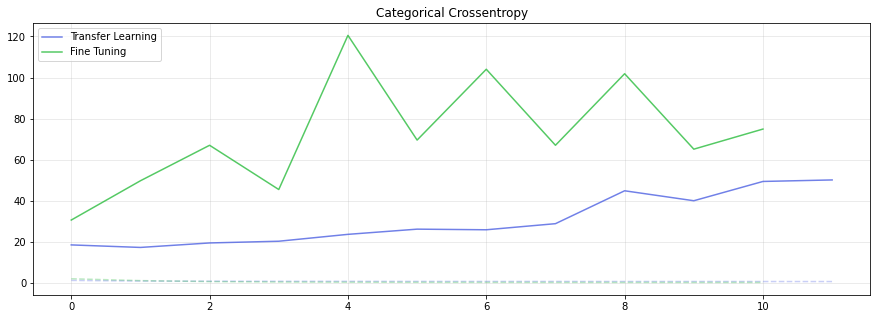

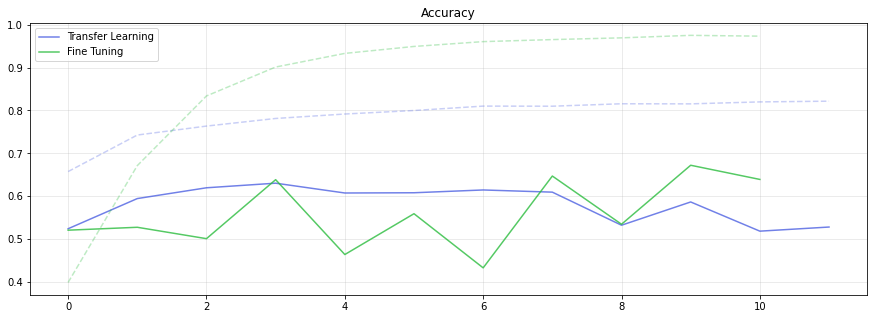

In [ ]:
# Plot the training
plt.figure(figsize=(15,5))
plt.plot(tl_history['loss'], alpha=.3, color='#4D61E2', linestyle='--')
plt.plot(tl_history['val_loss'], label='Transfer Learning', alpha=.8, color='#4D61E2')
plt.plot(ft_history['loss'], alpha=.3, color='#2ABC3D', linestyle='--')
plt.plot(ft_history['val_loss'], label='Fine Tuning', alpha=.8, color='#2ABC3D')
plt.legend(loc='upper left')
plt.title('Categorical Crossentropy')
plt.grid(alpha=.3)

plt.figure(figsize=(15,5))
plt.plot(tl_history['accuracy'], alpha=.3, color='#4D61E2', linestyle='--')
plt.plot(tl_history['val_accuracy'], label='Transfer Learning', alpha=.8, color='#4D61E2')
plt.plot(ft_history['accuracy'], alpha=.3, color='#2ABC3D', linestyle='--')
plt.plot(ft_history['val_accuracy'], label='Fine Tuning', alpha=.8, color='#2ABC3D')
plt.legend(loc='upper left')
plt.title('Accuracy')
plt.grid(alpha=.3)

plt.show()